In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import precision_recall_curve, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


import time

## Loading the final preprocessed trained dataset


In [2]:
full_cleaned_final= pd.read_csv('full_cleaned_final.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final.shape

(4092, 9)

In [3]:
#loading the train set

full_cleaned_final_train= pd.read_csv('full_cleaned_final_train.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final_train.shape

(2864, 9)

## Loading the test set

In [4]:
#Loading the test set
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv').drop(columns=['Unnamed: 0'])
full_cleaned_final_test.shape

(1228, 9)

In [5]:
len(full_cleaned_final_test.columns)

9

## Feature Engineering

In [6]:
full_cleaned_final_train.columns

Index(['scale__net_elec_imports', 'scale__per_capita_electricity',
       'scale__biofuel_elec_per_capita', 'scale__hydro_elec_per_capita',
       'scale__solar_elec_per_capita', 'scale__wind_elec_per_capita',
       'remainder__country', 'remainder__year', 'remainder__GDP_per_capita'],
      dtype='object')

In [7]:
full_cleaned_final_train['new_elec_per_capita'] = full_cleaned_final_train['scale__per_capita_electricity'] - full_cleaned_final_train['scale__hydro_elec_per_capita']
full_cleaned_final_test['new_elec_per_capita'] = full_cleaned_final_test['scale__per_capita_electricity'] - full_cleaned_final_test['scale__hydro_elec_per_capita']
full_cleaned_final['new_elec_per_capita'] = full_cleaned_final['scale__per_capita_electricity'] - full_cleaned_final['scale__hydro_elec_per_capita']


In [8]:
full_cleaned_final_train

,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita,new_elec_per_capita
0,0.536682,0.001896,0.000000,0.000000,0.000000,0.000000,Comoros,2018,1383.377789,0.001896
1,0.536682,0.011690,0.004495,0.003792,0.000000,0.000000,Congo,2020,1586.318297,0.007898
2,0.536682,0.147047,0.003190,0.001794,0.001342,0.002828,South Korea,2007,23360.905735,0.145253
3,0.537588,0.002427,0.000000,0.000390,0.000000,0.000000,Mauritania,2006,1601.141206,0.002037
4,0.538703,0.004056,0.000000,0.005729,0.000000,0.000000,Lesotho,2012,1075.620196,-0.001674
...,...,...,...,...,...,...,...,...,...,...
2859,0.536682,0.002856,0.000000,0.000000,0.000000,0.000000,Comoros,2021,1355.538730,0.002856
2860,0.537170,0.083870,0.000000,0.029741,0.000000,0.000000,Serbia,2008,5270.959534,0.054129
2861,0.588170,0.085270,0.000000,0.000000,0.000000,0.000000,Hong Kong,2003,28096.898252,0.085270
2862,0.541838,0.002090,0.000000,0.003040,0.000339,0.000000,Nepal,2011,748.012453,-0.000950


## Best features


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
X = full_cleaned_final[['scale__net_elec_imports',
                        'new_elec_per_capita',
                        'scale__per_capita_electricity', 
                        'scale__biofuel_elec_per_capita',
                        'scale__hydro_elec_per_capita', 
                        'scale__solar_elec_per_capita',
                        'scale__wind_elec_per_capita'
                       ]]


y = full_cleaned_final.iloc[:,-1]


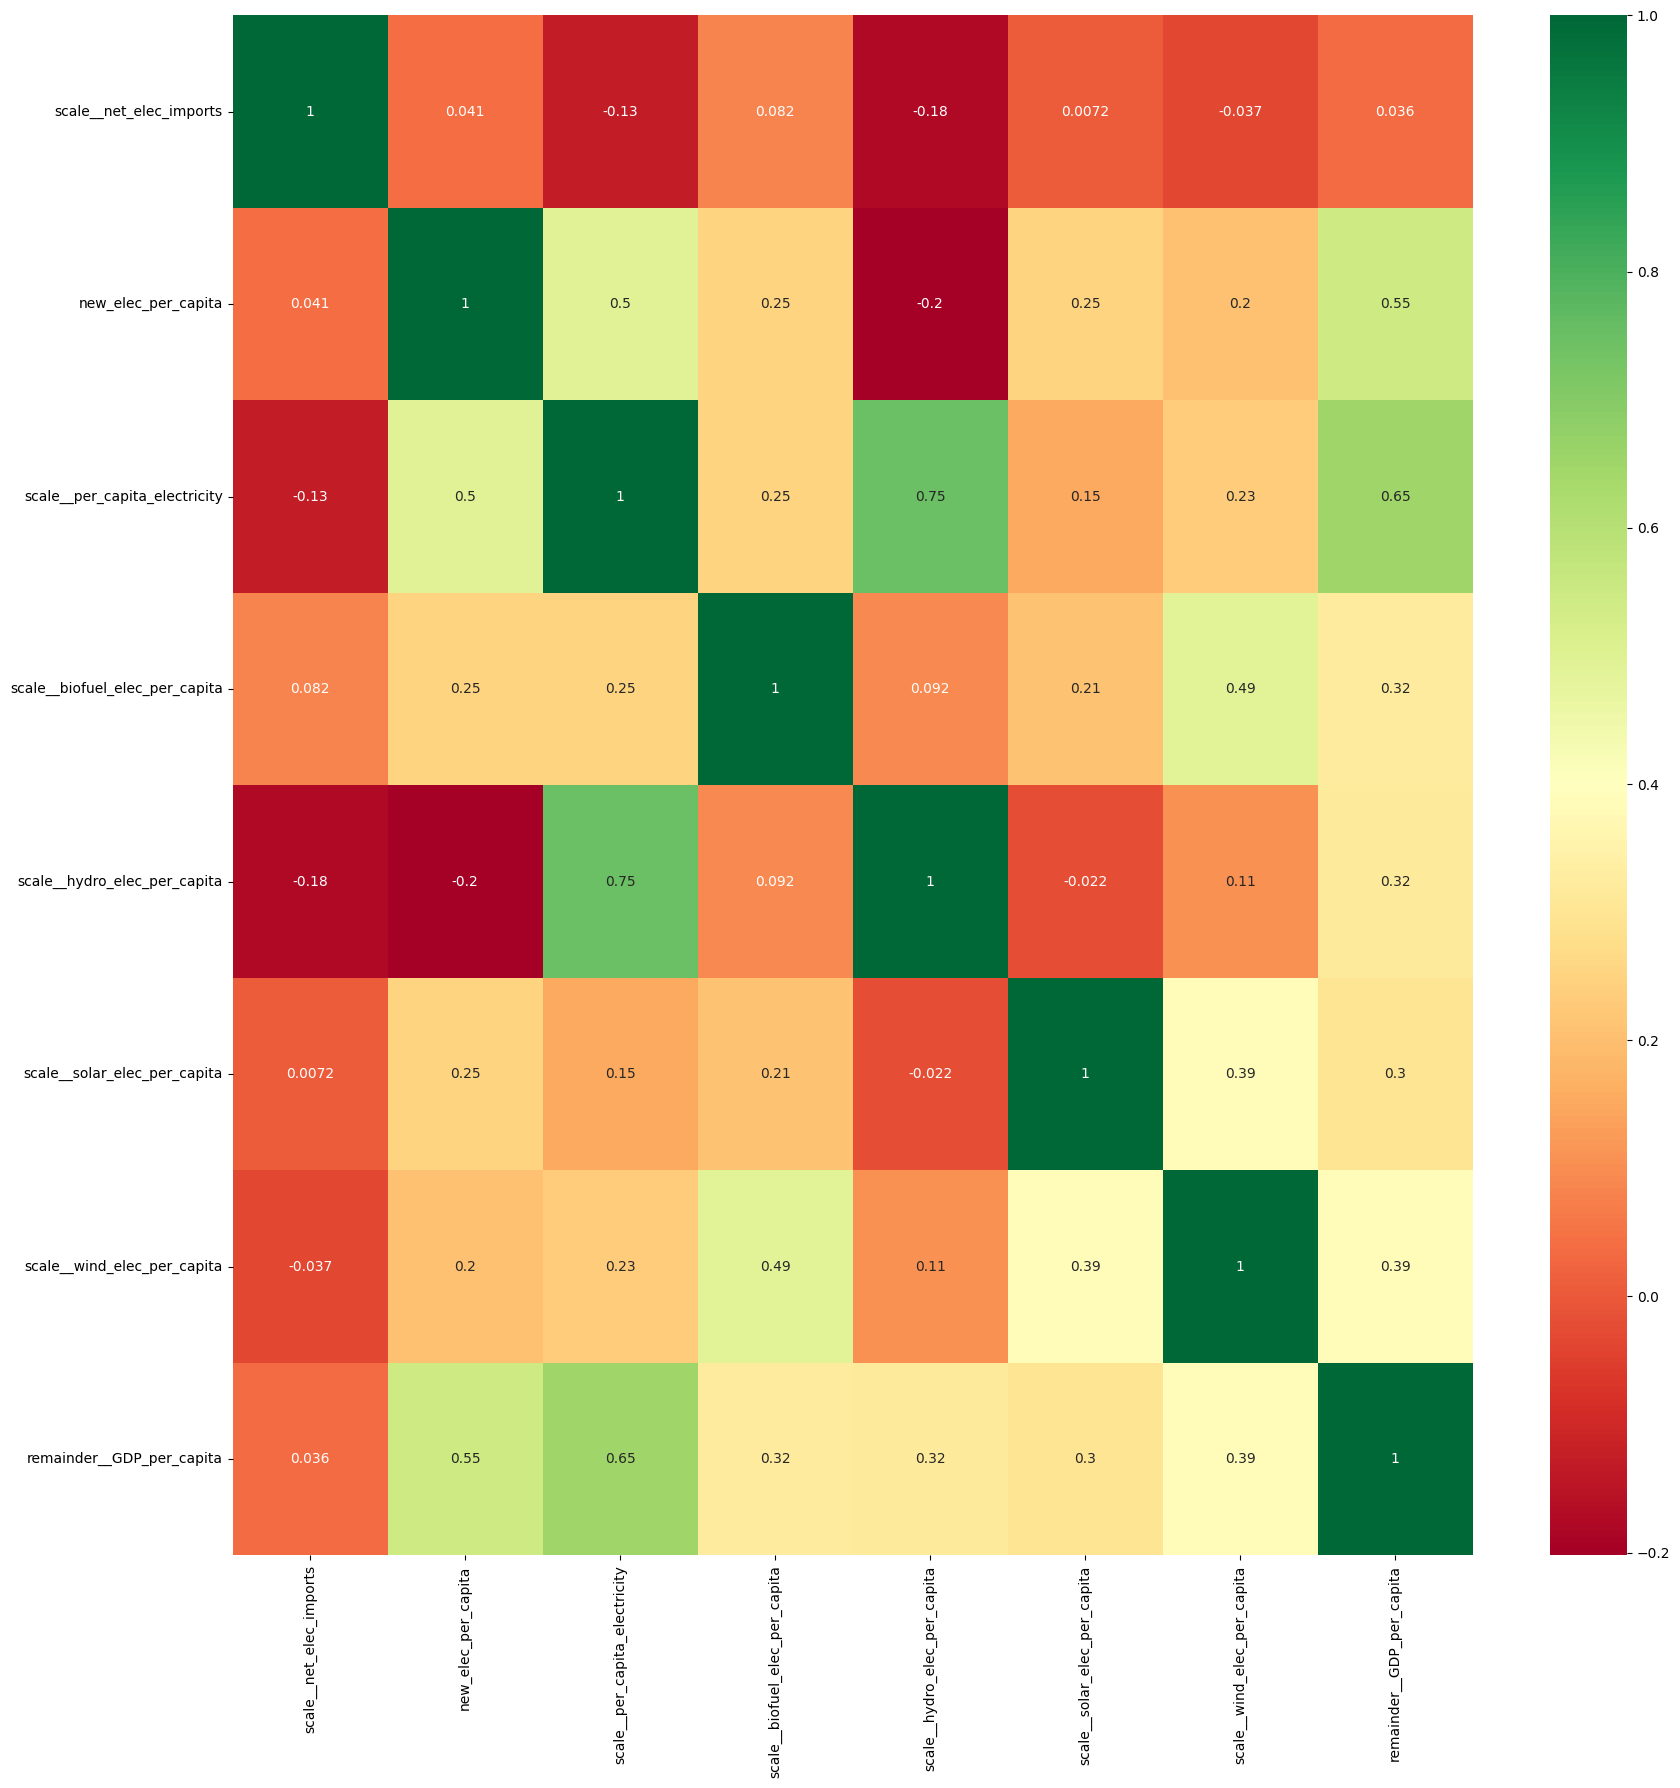

In [11]:
corrmat = full_cleaned_final[[  'scale__net_elec_imports',
                                'new_elec_per_capita',
                                'scale__per_capita_electricity', 
                                'scale__biofuel_elec_per_capita',
                                'scale__hydro_elec_per_capita', 
                                'scale__solar_elec_per_capita',
                                'scale__wind_elec_per_capita', 
                                'remainder__GDP_per_capita'
                       ]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_cleaned_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
#full_cleaned_final['scale__all_renewable'] = np.array(full_cleaned_final['scale__biofuel_electricity'])-np.array(full_cleaned_final['scale__wind_electricity'])+2*np.array(full_cleaned_final['scale__gas_production'])

#full_cleaned_final_test['scale__all_renewable'] = np.array(full_cleaned_final_test['scale__biofuel_electricity'])-np.array(full_cleaned_final_test['scale__wind_electricity'])+2*np.array(full_cleaned_final_test['scale__gas_production'])

In [13]:
full_cleaned_final.columns

Index(['scale__net_elec_imports', 'scale__per_capita_electricity',
       'scale__biofuel_elec_per_capita', 'scale__hydro_elec_per_capita',
       'scale__solar_elec_per_capita', 'scale__wind_elec_per_capita',
       'remainder__country', 'remainder__year', 'remainder__GDP_per_capita',
       'new_elec_per_capita'],
      dtype='object')

In [14]:
full_cleaned_final1 = full_cleaned_final.drop(columns=['remainder__year','remainder__country'])

In [15]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   scale__net_elec_imports         4092 non-null   float64
 1   scale__per_capita_electricity   4092 non-null   float64
 2   scale__biofuel_elec_per_capita  4092 non-null   float64
 3   scale__hydro_elec_per_capita    4092 non-null   float64
 4   scale__solar_elec_per_capita    4092 non-null   float64
 5   scale__wind_elec_per_capita     4092 non-null   float64
 6   remainder__GDP_per_capita       4092 non-null   float64
 7   new_elec_per_capita             4092 non-null   float64
dtypes: float64(8)
memory usage: 255.9 KB


In [16]:
full_cleaned_final1['remainder__GDP_per_capita'].head(3)

0    368.187174
1    378.391401
2    359.766343
Name: remainder__GDP_per_capita, dtype: float64

## Statistical inference

### Impact of Biofuel in GDP_Per_capita

In [17]:
# Checking the R-sqaured
#model1.rsquared

In [18]:
#model1.summary()

### Impact of biofuel_elec_per_capita on GDP

In [19]:
model_bio = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_elec_per_capita', data=full_cleaned_final1).fit()

print(model_bio.params)
model_bio.rsquared

Intercept                         11762.474761
scale__biofuel_elec_per_capita    70669.534988
dtype: float64


0.10481605916571501

### Impact of Oil_production in GDP_Per_capita

###  Net imports

In [20]:
model_elec_imports = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__net_elec_imports', data=full_cleaned_final1).fit()

print(model_elec_imports.params)
model_elec_imports.rsquared


Intercept                   8048.242502
scale__net_elec_imports    10529.477702
dtype: float64


0.0012672993574179836

### Fossil

### Gas production

### Impact of hydro_electricity on GDP

### Impact of hydro_elec_per_capita on GDP

In [21]:
model__hydro_elec_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_elec_per_capita', data=full_cleaned_final1).fit()

print(model__hydro_elec_per_capita.params)
model__hydro_elec_per_capita.rsquared

Intercept                       12116.529944
scale__hydro_elec_per_capita    71494.513490
dtype: float64


0.10104620533490061

### Impact of Solar_electricity on GDP

### Impact of solar_elec_per_capita on GDP

In [22]:
model_solar_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_elec_per_capita', data=full_cleaned_final).fit()

print(model_solar_per_capita.params)
model_solar_per_capita.rsquared
model_solar_per_capita.summary()

Intercept                       12061.722287
scale__solar_elec_per_capita    79681.499636
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.088
Model:                                   OLS   Adj. R-squared:                  0.088
Method:                        Least Squares   F-statistic:                     396.3
Date:                       Mon, 12 Jun 2023   Prob (F-statistic):           3.05e-84
Time:                               12:44:26   Log-Likelihood:                -45868.
No. Observations:                       4092   AIC:                         9.174e+04
Df Residuals:                           4090   BIC:                         9.175e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.206e+04    291.140     41.429      0.000    1.15e+04    1.26e+04
scale__solar_elec_per_capita  7.968e+04   4002.619     19.907      0.000    7.18e+04    8.75e+04
==============================================================================
Omnibus:                     1833.714   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8172.274
Skew:                           2.210   Prob(JB):                         0.00
Kurtosis:                       8.329   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Wind_electricity on GDP

### Impact of wind_elec_per_capita on GDP

In [23]:
model_wind_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_elec_per_capita', data=full_cleaned_final).fit()
print(model_wind_per_capita.params)
model_wind_per_capita.rsquared

Intercept                      11604.917379
scale__wind_elec_per_capita    78288.470109
dtype: float64


0.15028746760131473

### Impact of biofuel and wind_electricity on GDP

In [24]:
model_perCapita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__per_capita_electricity', data=full_cleaned_final).fit()

print(model_perCapita.params)
model_perCapita.rsquared

Intercept                          5315.070544
scale__per_capita_electricity    129800.633422
dtype: float64


0.424118481364239

## Training an OLS model

In [25]:
X_train = full_cleaned_final_train[['scale__net_elec_imports',
                                    'new_elec_per_capita',
                                    'scale__hydro_elec_per_capita',
                                    'scale__biofuel_elec_per_capita',
                                    'scale__solar_elec_per_capita',
                                    'scale__wind_elec_per_capita']]

X_test = full_cleaned_final_test[['scale__net_elec_imports',
                                  'new_elec_per_capita',                                  
                                  'scale__hydro_elec_per_capita',
                                  'scale__biofuel_elec_per_capita',
                                  'scale__solar_elec_per_capita',
                                  'scale__wind_elec_per_capita']]


y_train = full_cleaned_final_train[['remainder__GDP_per_capita']]
y_test = full_cleaned_final_test[['remainder__GDP_per_capita']]

In [26]:
print(X_train.shape)
np.linalg.matrix_rank(X_train)

(2864, 6)


6

### Train on OLS model

In [27]:
model = sm.OLS(y_train,X_train).fit()

# Your predictions
y_pred = model.predict(X_test)

In [28]:
y_pred

0        5777.889529
1       17457.850095
2       11438.845240
3        4402.071489
4        8189.760910
            ...     
1223    24463.691362
1224     4712.594447
1225     6647.795524
1226     5960.828007
1227    20379.470484
Length: 1228, dtype: float64

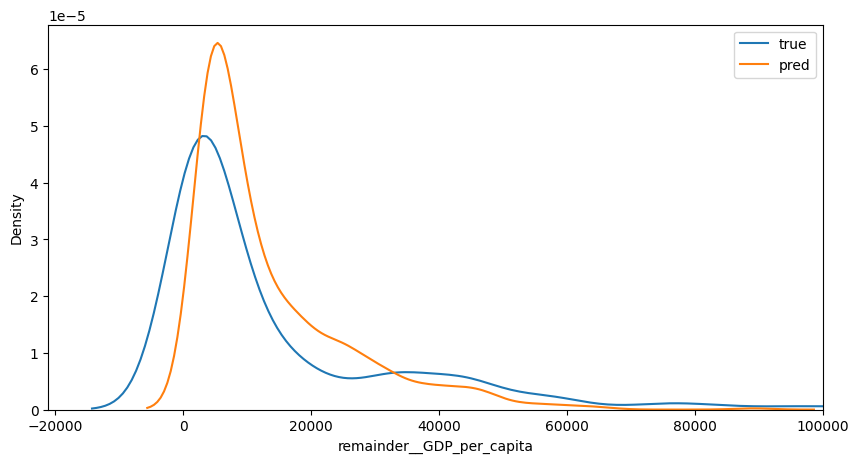

In [29]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_test['remainder__GDP_per_capita'], label = 'true')
sns.kdeplot(y_pred, label = 'pred')
plt.xlim(xmax=10e4)
plt.legend()

## Train with a linear regression model

In [30]:
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.score(X_test,y_test)

0.5386021744518901

# Trying Ridge

In [32]:
Poly_model = PolynomialFeatures(degree=3)
ridge_model = Ridge(alpha=0.1)  # alpha controls the strength of the regularization

# Create a pipeline to combine the polynomial features and the Ridge model
pipeline = make_pipeline(Poly_model, ridge_model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
print(score, 'test_score')

y_pred = pipeline.predict(X_train)

r2_score_train=r2_score(y_train,y_pred)
print(r2_score_train, 'train score')

0.5953353390414113 test_score
0.6402114363746835 train score


In [33]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.99971584 0.99592722 0.99937774 0.99823157 0.99760144]
Mean cross-validation score: 0.9981707640307269
Standard deviation of cross-validation scores: 0.0013568600998123883


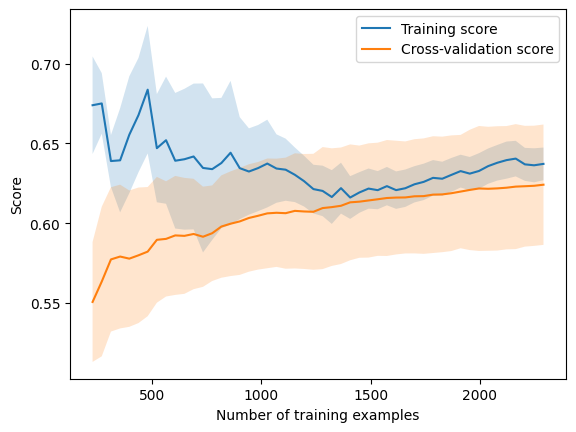

In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 50)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Elastic Net

In [34]:
from sklearn.linear_model import ElasticNet

Poly_model = PolynomialFeatures(degree=4)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.4)  # alpha controls the strength of the regularization, l1_ratio controls the balance between L1 and L2 regularization

# Create a pipeline to combine the polynomial features and the ElasticNet model
pipeline = make_pipeline(Poly_model, elasticnet_model)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
score

0.1450796916914946

# Decision Tree

In [35]:
np.sqrt(X_train.shape[0])

53.51635264103861

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Create a decision tree regressor
print('Starting')
for a in range(3, 10):
    for b in range(2, 12):
        for c in range(1, 10):
            tree = DecisionTreeRegressor(max_depth=a, 
                                         criterion='friedman_mse',
                                         random_state=0,
                                         min_samples_split=b, 
                                         min_samples_leaf=c, 
                                         min_weight_fraction_leaf=0.0, 
                                         max_features=None,
                                         max_leaf_nodes=None, 
                                         min_impurity_decrease=0, 
                                         ccp_alpha=0.1)
            
            # Fit the model to the training data
            tree.fit(X_train, y_train)
            
            
            # Evaluate the model on the training data
            y_train_pred = tree.predict(X_train)
            r2_train = r2_score(y_train, y_train_pred)
            
            # Evaluate the model on the test data
            y_test_pred = tree.predict(X_test)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Compute the mean absolute error
            mae = mean_absolute_error(y_test, y_test_pred)
            
            # Compute the mean squared error
            mse = mean_squared_error(y_test, y_test_pred)
            
            if r2_train - r2_test < 0.03 and r2_test > 0.625:
                print(a, b, c)
                print("Training set R^2 score:", r2_train)
                print("Test set R^2 score:", r2_test)
                if r2_train - r2_test < 0.04:
                    print('found the model  '*6)
                    
                print("Test set mean absolute error:", mae)
                if mae < 3300:
                    print('   *'*30)
                print("Test set mean squared error:", mse)
                print("-"*50)
print('finished')

Starting
3 2 3
Training set R^2 score: 0.6307785609154288
Test set R^2 score: 0.6276243180496893
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 6769.58774364665
Test set mean squared error: 149786813.16779962
--------------------------------------------------
3 2 4
Training set R^2 score: 0.6307785609154288
Test set R^2 score: 0.6276243180496893
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 6769.58774364665
Test set mean squared error: 149786813.16779962
--------------------------------------------------
3 2 5
Training set R^2 score: 0.6307785609154288
Test set R^2 score: 0.6276243180496893
found the model  found the model  found the model  found the model  found the model  found the model  
Test set mean absolute error: 6769.58774364665
Test set mean squared error: 149786813.16779962
-------------------------------

In [37]:
# Define the range of hyperparameters to search over using grid search
param_grid = {
    "n_estimators": [50, 100, 200]
}
# Create a grid of hyperparameters to search over
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring="neg_mean_squared_error",
)
# Use k-fold cross-validation to evaluate the performance of the model on each combination of hyperparameters in the grid
grid_search.fit(X_train, y_train)
# Fit the random forest model on the training data using the optimal hyperparameters found in step 4
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)
# Evaluate the performance of the model on the testing data
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE on testing data:", mse)

/home/pedroabisamara/.pyenv/versions/energy-economy/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedroabisamara/.pyenv/versions/energy-economy/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedroabisamara/.pyenv/versions/energy-economy/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedroabisa

MSE on testing data: 51686763.35330168


In [100]:
pd.DataFrame(y).describe()

,remainder__GDP_per_capita
count,3273.000000
mean,13470.902168
std,18298.489875
min,255.100291
25%,1711.290666
50%,5262.183808
75%,17662.242842
max,112417.878458


# Random Forest

In [102]:
y_train = np.array(y_train).reshape(2864,)
y_train

array([ 1383.37778923,  1586.31829662, 23360.90573538, ...,
       28096.89825156,   748.01245347,  3445.80688587])

In [122]:


rf = RandomForestRegressor(n_estimators=80, 
                            criterion='absolute_error', 
                            max_depth=9, 
                            min_samples_split=3, 
                            min_samples_leaf=2, 
                            max_features=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.5, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=-1, 
                            random_state=0, 
                            verbose=0, 
                            warm_start=False, 
                            ccp_alpha=0.1, 
                            max_samples=None)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_test_pred)

# Print the results

print(a)
print("Training set R^2 score:", r2_train)
print("Test set R^2 score:", r2_test)
if r2_train-r2_test < 0.04:
    print('found the model  '*6)
    
print("Test set mean absolute error:", mae)
if mae < 3300:
    print('   *'*30)
print("Test set mean squared error:", mse)
print("-"*50)

80
Training set R^2 score: 0.9181358421912379
Test set R^2 score: 0.864125813899076
Test set mean absolute error: 2983.608996779507
   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *   *
Test set mean squared error: 54654915.22226126
--------------------------------------------------


### Train on Polynomial linear Regression model

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Poly_model = PolynomialFeatures(degree=3)
X_poly = Poly_model.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)


y_pred = model.predict(X_poly)


r2_score_train=r2_score(y_train,y_pred)
print(f'r2_score test: {r2_score_train}')

X_test_poly = Poly_model.transform(X_test)

y_test_pred = model.predict(X_test_poly)
r2_score_test =r2_score(y_test,y_test_pred)
print(f'r2_score test: {r2_score_test}')

r2_score test: 0.7235946272294715
r2_score test: 0.6736376726234099


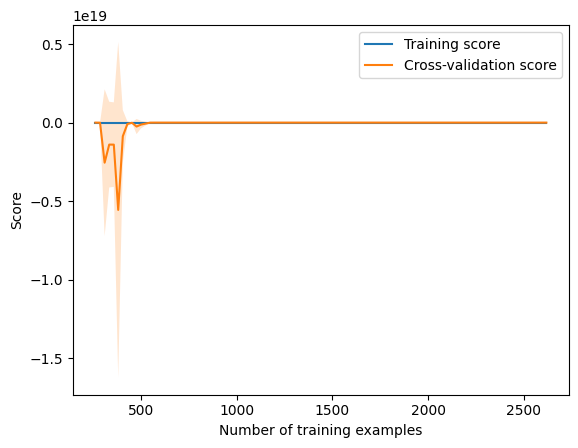

In [98]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 100)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_poly, y_train, train_sizes=train_sizes, cv=5)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### Root mean square error

In [64]:
import math
MSE = np.square(np.subtract(y_test,y_test_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

12289.193306773763


/tmp/ipykernel_12331/603380909.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  RMSE = math.sqrt(MSE)


### Mean absolute error

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_test_pred)


6410.523655729831

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [67]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)

                        variables       VIF
0         scale__net_elec_imports  1.597067
1    scale__hydro_elec_per_capita  2.665174
2  scale__biofuel_elec_per_capita  1.535174
3    scale__solar_elec_per_capita  1.332547
4     scale__wind_elec_per_capita  1.641873
5   scale__per_capita_electricity  3.828396


## Same process with the base model

In [69]:
full_cleaned_base=pd.read_csv('full_cleaned_final.csv')

In [70]:
modelb1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_base).fit()

print(modelb1.params)

PatsyError: Error evaluating factor: NameError: name 'scale__biofuel_electricity' is not defined
    remainder__GDP_per_capita ~ scale__biofuel_electricity
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [71]:
modelb2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_base).fit()

print(modelb2.params)

PatsyError: Error evaluating factor: NameError: name 'scale__hydro_electricity' is not defined
    remainder__GDP_per_capita ~ scale__hydro_electricity
                                ^^^^^^^^^^^^^^^^^^^^^^^^